### Ridge and Lasso Implementation in Python

## Ridge and Lasso Regression

Ridge and Lasso Regression are regularization techniques used to improve the performance of linear regression models, especially when dealing with multicollinearity or when the model is at risk of overfitting.

### Ridge Regression
- **Penalty:** Adds an L2 penalty, which is the sum of the squared values of the coefficients.
- **Effect:** Shrinks the coefficients towards zero but does not set any of them exactly to zero.
- **Use Case:** Useful when all features are expected to have some influence on the output.
- **Objective Function:**  
    $$
    \text{Minimize} \quad \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p \beta_j^2
    $$
    where $\alpha$ is the regularization parameter.

### Lasso Regression
- **Penalty:** Adds an L1 penalty, which is the sum of the absolute values of the coefficients.
- **Effect:** Can shrink some coefficients to exactly zero, effectively performing feature selection.
- **Use Case:** Useful when only a subset of features are expected to be important.
- **Objective Function:**  
    $$
    \text{Minimize} \quad \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p |\beta_j|
    $$

### Key Differences
- **Ridge**: Tends to keep all features but reduces their impact.
- **Lasso**: Can eliminate some features entirely by setting their coefficients to zero.

Both methods help to prevent overfitting and improve the generalization of linear regression models.

Ridge Regression MSE: 160739466.49
Ridge Regression R2: 0.98
Ridge Predictions [301510.79 519541.51]
Lasso Regression MSE: 160740918.48
Lasso Regression R2: 0.98
Lasso Predictions [301510.75 519541.58]


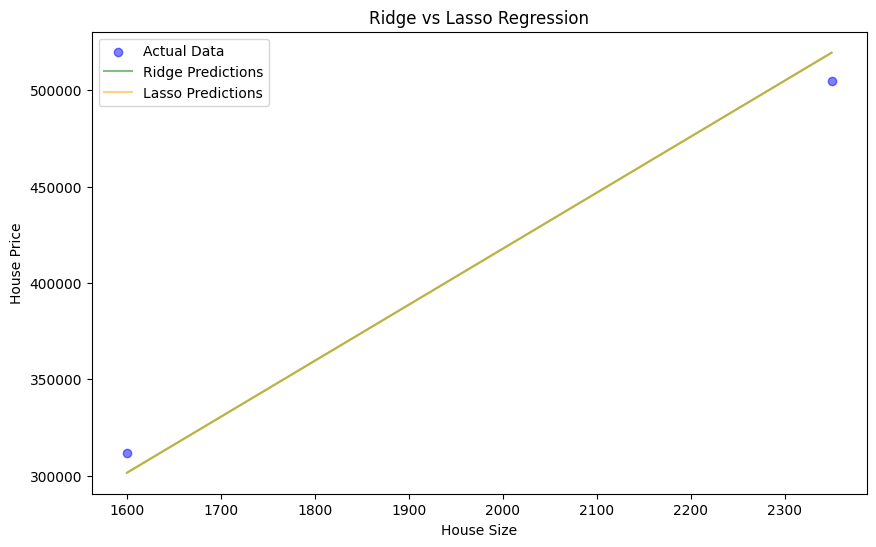

In [3]:
# import necessary libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# sample data (e.g house size vs house price)
X = np.array([[1400],[1600],[1700],[1875],[1100],[2350],[2450],[2750]])
y = np.array([245000,312000,309000,363000,169000,505000,600000,610000])

# split intp training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit ridge regression model
ridge_model = Ridge(alpha=1.0) # alpha controls the regularization strength
ridge_model.fit(X_train, y_train)

# make predictions
ridge_pred = ridge_model.predict(X_test)

# evaluate model performance
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression MSE:", np.round(ridge_mse, 2))
print("Ridge Regression R2:", np.round(ridge_r2, 2))
print("Ridge Predictions", np.round(ridge_pred, 2)) 

# fit lasso regression model
lasso_model = Lasso(alpha=0.1) # alpha controls the regularization strength
lasso_model.fit(X_train, y_train)

# make predictions
lasso_pred = lasso_model.predict(X_test)

# evaluate model performance
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Lasso Regression MSE:", np.round(lasso_mse, 2))
print("Lasso Regression R2:", np.round(lasso_r2, 2))
print("Lasso Predictions", np.round(lasso_pred, 2))

# visualise both models
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color="blue", label="Actual Data", alpha=0.5)
plt.plot(X_test, ridge_pred, color="green", label="Ridge Predictions", alpha=0.5)
plt.plot(X_test, lasso_pred, color="orange", label="Lasso Predictions", alpha=0.5)
plt.title("Ridge vs Lasso Regression")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.legend()
plt.show()